In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math
import random

dataDir = 'c:/Users/llave/Documents/CMS/data/electron_selection_failSelection_compressed/'

In [37]:
electronsTotal = np.load("electronsTotal.npy")
electronsFailedEReco = np.load("electronsFailedEReco.npy")

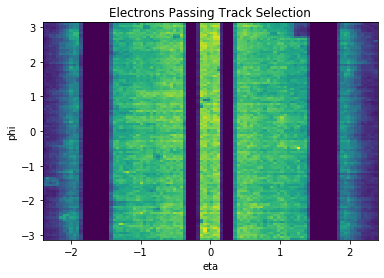

In [38]:
total_etas = electronsTotal[:,0]
total_phis = electronsTotal[:,1]
plt.title("Electrons Passing Track Selection")
plt.xlabel("eta")
plt.ylabel("phi")
hist, xbins, ybins, im = plt.hist2d(total_etas, total_phis, bins=100)

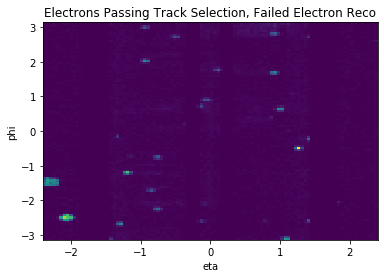

In [39]:
failEReco_etas = electronsFailedEReco[:,0]
failEReco_phis = electronsFailedEReco[:,1]
plt.title("Electrons Passing Track Selection, Failed Electron Reco")
plt.xlabel("eta")
plt.ylabel("phi")
hist2, xbins, ybins, im = plt.hist2d(failEReco_etas, failEReco_phis, bins=100)

30529.0 2505178.0


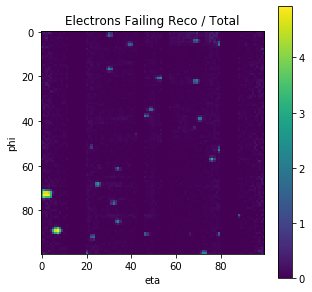

In [45]:
ratio_hist = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if(not(hist[i,j] == 0)): ratio_hist[i,j] = 1.0*hist2[i,j]/(hist[i,j]*0.2)
        else: ratio_hist[i,j] = 0
plt.figure(figsize=(5,5))
plt.title("Electrons Failing Reco / Total")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(np.rot90(ratio_hist))
plt.colorbar()
print(np.sum(hist2),np.sum(hist))

In [21]:
resultsDir = "c:/Users/llave/Desktop/failSelection_p0/"
indices = np.load(resultsDir+"outputFiles/falseEventsE.npy",allow_pickle=True)
indices = np.reshape(indices,(int(indices.shape[0]/4),4))
print(indices.shape)
false_indices = np.array([x for x in indices if x[3]<=0.5])
true_indices = np.array([x for x in indices if x[3]>0.5])
print(true_indices.shape, false_indices.shape)

(6017, 4)
(5950, 4) (67, 4)


In [23]:
etas, phis = [],[]
muonRecos, tauRecos = [],[]
for event in true_indices:
    fileNum = int(event[0])
    eventNum = int(event[1])
    label = event[2]
    pred = event[3]
            
    infos = np.load(dataDir+'e_0p25_{0}.npz'.format(str(fileNum)))['infos']
    for info in infos:
        if(int(info[1]) == eventNum):
            etas.append(info[7])
            phis.append(info[8])
            muonRecos.append(info[5])
            tauRecos.append(info[6])

5950.0


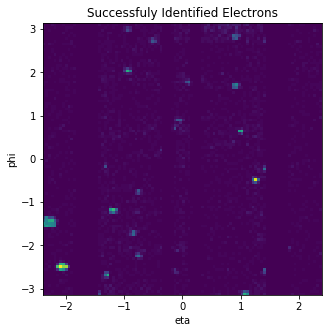

In [43]:
plt.figure(figsize=(5,5))
plt.title("Successfuly Identified Electrons")
plt.xlabel("eta")
plt.ylabel("phi")
hist3,_,_,_ = plt.hist2d(etas,phis,bins=100)
print(np.sum(hist3))

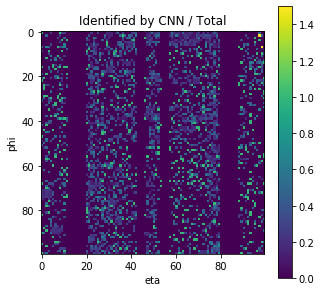

In [49]:
ratio_hist_2 = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if(not(hist2[i,j] == 0)): ratio_hist_2[i,j] = 1.0*hist3[i,j]/hist2[i,j]
        else: ratio_hist_2[i,j] = 0
plt.figure(figsize=(5,5))
plt.title("Identified by CNN / Total")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(np.rot90(ratio_hist_2))
plt.colorbar()

In [ ]:
nPassTauReco = len([x for x in tauRecos if math.fabs(x)<0.15])
nPassMuonReco = len([x for x in muonRecos if math.fabs(x)<0.15])
print(nPassTauReco,nPassTauReco*1.0/len(false_indices))
print(nPassMuonReco,nPassMuonReco*1.0/len(false_indices))

In [ ]:
plt.hist(etas,bins=100)

In [ ]:
plt.hist(phis,bins=100)